# Feature Selection: An Introduction to Advanced Regression Techniques

In this lab you'll continue to investigate regression models and how models can be over or underfit. We'll also continue to see the role multicollinearity plays in creating regression models. This will then lead us to investigating Regularization techniques such as Lasso and Ridge regression in the next section.  

Today's dataset has a large number of features concerning real estate properties. The final column of this dataset is 'Sales Price' which we would like to create a regression model for. This model could have several purposes. First, if we have data about a property, we would like to know roughly how much the property is apt to sell for. Secondly, we would like to know what features (such as location, number of bedrooms, bathrooms, etc.) are most impactful in determining sales price so that we could prioritize potential home improvements to increase profits.

# Recall the General Outline for Regression

1. Import Data
2. Preprocess
3. Train-Test Split
4. Initialize Model
5. Fit Model
6. Calculate Errors
7. Repeat steps 2-6 with additional feature engineering 

# 1) Import the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Housing_Kaggle/train.csv')
print(len(df))
df.head()

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

# Feature selection by adding one attribute at a time
Iterate through each feature and calculate the r^2 coefficient for at least 3 different train test split samples. Store these values in a dictionary so that you have
model_scores = {col_name : (avg_r^2_train, avg_r^2_test)} for each column. Then create a dataframe of these values and sort it by the average test score. Preview the top 5 predictive features.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [6]:
ols = LinearRegression()
model_scores = {}
for col in X.columns:
    try:
        train_r2 = []
        test_r2 = []
        for i in range(3):
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            ols.fit(np.array(X_train[col]).reshape(-1,1), y_train)
            train_r2.append(ols.score(np.array(X_train[col]).reshape(-1,1), y_train))
            test_r2.append(ols.score(np.array(X_test[col]).reshape(-1,1), y_test))
        model_scores[col] = (np.mean(train_r2), np.mean(test_r2))
        if col == 'OverallQual':
            print(model_scores[col])
    except:
        continue
#         print("Couldn't perform regression using {}, probably not a numeric feature.".format(col))
#         print("Top feature attributes:\n", df[col].value_counts(normalize=True)[:5])
model_scores = pd.DataFrame.from_dict(model_scores, orient='index')
model_scores.columns = ['Train_r2', 'Test_r2']
model_scores = model_scores.sort_values(by='Test_r2', ascending=False)
model_scores.head()

(0.6233504337091215, 0.6347596402211834)


,Train_r2,Test_r2
OverallQual,0.623350,0.634760
TotalBsmtSF,0.360389,0.423886
GrLivArea,0.526070,0.412337
GarageArea,0.381030,0.410302
GarageCars,0.416398,0.386165


In [7]:
# Your code here
#Iterate through columns
#Perform a regression for 3 different train-test splits
#Calculate train / test r^2 for each split
#Store avg train r^2 and avg test r^2 in master dictionary
#Turn master dictionary into dataframe
#Sort dataframe by test r^2
#Preview top 5 predictive features.

# Find the second most impactful feature in addition to the first.
Iterate back through all of the column features (except Make note of the most predictive feature from above. Repeat the process to find the second most useful feature in conjunction with the most important feature. **Be sure to include 2 variables in each of your models; one will always be the most predictive from the previous exercise and the second will be some other column.** 

In [9]:
# Your code here
ols = LinearRegression()
model2_scores = {}
cur_feats = ['OverallQual']
for iteration, col in enumerate(X.columns):
    try:
        train_r2 = []
        test_r2 = []
        feats = cur_feats + [col]
        for i in range(3):
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            ols.fit(X_train[feats], y_train)
            train_r2.append(ols.score(X_train[feats], y_train))
            test_r2.append(ols.score(X_test[feats], y_test))
        model2_scores[col] = (np.mean(train_r2), np.mean(test_r2))
    except Exception as e:
        if iteration < 5:
            print(e)
        continue
#         print("Couldn't perform regression using {}, probably not a numeric feature.".format(col))
#         print("Top feature attributes:\n", df[col].value_counts(normalize=True)[:5])
model2_scores = pd.DataFrame.from_dict(model2_scores, orient='index')
model2_scores.columns = ['Train_r2', 'Test_r2']
model2_scores = model2_scores.sort_values(by='Test_r2', ascending=False)
model2_scores.head()

could not convert string to float: 'RL'
Input contains NaN, infinity or a value too large for dtype('float64').


,Train_r2,Test_r2
GrLivArea,0.716578,0.694518
TotRmsAbvGrd,0.666643,0.691269
1stFlrSF,0.693233,0.688560
GarageArea,0.667524,0.686759
GarageCars,0.666893,0.670151


# Notes: Messy Scratchpad

Here we demonstrate how you might start investigating and pulling apart some of the more complex nested objects in the code snippet above. This is how you yourself might play around with the code as you write and build a longer block like above, or try to decipher a longer block of code.

In [10]:
cur_feats

['OverallQual']

In [11]:
col

'SaleCondition'

In [12]:
cur_feats + [col]

['OverallQual', 'SaleCondition']

In [13]:
model2_scores.head()

,Train_r2,Test_r2
GrLivArea,0.716578,0.694518
TotRmsAbvGrd,0.666643,0.691269
1stFlrSF,0.693233,0.688560
GarageArea,0.667524,0.686759
GarageCars,0.666893,0.670151


In [14]:
model2_scores.index[0]

'GrLivArea'

In [15]:
model2_scores.iloc[0]

Train_r2    0.716578
Test_r2     0.694518
Name: GrLivArea, dtype: float64

In [16]:
type(model2_scores.iloc[0])

pandas.core.series.Series

In [17]:
model2_scores.iloc[0]['Train_r2']

0.716577872870524

In [18]:
tuple(model2_scores.iloc[0])

(0.716577872870524, 0.6945179914955402)

# Continue adding features, one at a time and graph train / test accuracy against number of features.
#### Hint: First formalize the previous question as a function. 
The graph should include the number of model feaures on the x axis and the  r^2 values for the train and test splits on the y-axis.

In [19]:
def add_feature(cur_feats, X, y):
    ols = LinearRegression()
    model_scores = {}
    for iteration, col in enumerate(X.columns):
        try:
            train_r2 = []
            test_r2 = []
            feats = cur_feats + [col]
            for i in range(3):
                X_train, X_test, y_train, y_test = train_test_split(X, y)
                ols.fit(X_train[feats], y_train)
                train_r2.append(ols.score(X_train[feats], y_train))
                test_r2.append(ols.score(X_test[feats], y_test))
            model_scores[col] = (np.mean(train_r2), np.mean(test_r2))
        except Exception as e:
#             if iteration < 5:
#                 print(e)
            continue
    model_scores = pd.DataFrame.from_dict(model_scores, orient='index')
    model_scores.columns = ['Train_r2', 'Test_r2']
    model_scores = model_scores.sort_values(by='Test_r2', ascending=False)
    new_feat = model_scores.index[0]
    cur_feats.append(new_feat)
    new_model_scores = [len(cur_feats)] + list(model_scores.iloc[0])
    return cur_feats, new_model_scores

# Notes
* Notice that once OverallQual is in the model, adding it again does not add more predictive value
* Notice that while GrLivArea was the second most important feature by itself, the feature importance of some of the other top features shuffled when in conjunction with 'OverallQual'.
* Notice that while the overall r^2 continues to improve, our gains are starting to trail off (we also cannot ever get >1 as an r^2 value)

In [20]:
[2] + list(model2_scores.iloc[0])

[2, 0.716577872870524, 0.6945179914955402]

In [21]:
cur_feats = ['OverallQual', 'GrLivArea']
model_scores = [[2, 0.7064032126207153, 0.7216830264190167]] #List of nested lists [[n_feats, train_r2, test_r2], [n_feats, train_r2, test_r2], ... ]
for i in range(3,60):
    cur_feats, new_model_scores = add_feature(cur_feats, X, y)
    model_scores.append(new_model_scores)
    print('Current Number of Features:', new_model_scores[0])
    print('Current Train r^2:', new_model_scores[1])
    print('Current Test r^2:', new_model_scores[2])

Current Number of Features: 3
Current Train r^2: 0.736945800689269
Current Test r^2: 0.7728662620677277
Current Number of Features: 4
Current Train r^2: 0.7296746311388443
Current Test r^2: 0.802890288384288
Current Number of Features: 5
Current Train r^2: 0.7383860032649384
Current Test r^2: 0.8034660818091846
Current Number of Features: 6
Current Train r^2: 0.7396986061252764
Current Test r^2: 0.8094431211187771
Current Number of Features: 7
Current Train r^2: 0.7377551375186068
Current Test r^2: 0.8087931208141188
Current Number of Features: 8
Current Train r^2: 0.7386686932322865
Current Test r^2: 0.8040328471035711
Current Number of Features: 9
Current Train r^2: 0.7458856342559733
Current Test r^2: 0.8059574499793091
Current Number of Features: 10
Current Train r^2: 0.7581707397588575
Current Test r^2: 0.8168693231518106
Current Number of Features: 11
Current Train r^2: 0.7708226633165579
Current Test r^2: 0.8144927677429649
Current Number of Features: 12
Current Train r^2: 0.769

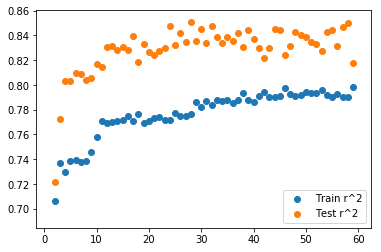

In [22]:
plt.scatter([s[0] for s in model_scores], [s[1] for s in model_scores], label='Train r^2')
plt.scatter([s[0] for s in model_scores], [s[2] for s in model_scores], label='Test r^2')
plt.legend()

# Repeat this process using Mean Squarred Error (MSE) instead of the R^2 Value
Note: MSE should be minimized as opposed to R^2 which we were maximizing.

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Check out the docstring for how to use this function.

In [25]:
mean_squared_error?

In [26]:
#Your code here
def add_feature(cur_feats, X, y):
    ols = LinearRegression()
    model_scores = {}
    for iteration, col in enumerate(X.columns):
        try:
            train_err = []
            test_err = []
            feats = cur_feats + [col]
            for i in range(3):
                X_train, X_test, y_train, y_test = train_test_split(X, y)
                ols.fit(X_train[feats], y_train)
                y_hat_train = ols.predict(X_train[feats])
                y_hat_test = ols.predict(X_test[feats])
                train_err.append(mean_squared_error(y_train, y_hat_train))
                test_err.append(mean_squared_error(y_test, y_hat_test))
            model_scores[col] = (np.mean(train_err), np.mean(test_err))
        except Exception as e:
#             if iteration < 5:
#                 print(e)
            continue
    model_scores = pd.DataFrame.from_dict(model_scores, orient='index')
    model_scores.columns = ['Train_err', 'Test_err']
    model_scores = model_scores.sort_values(by='Test_err')
    new_feat = model_scores.index[0]
    cur_feats.append(new_feat)
    new_model_scores = [len(cur_feats)] + list(model_scores.iloc[0])
    return cur_feats, new_model_scores

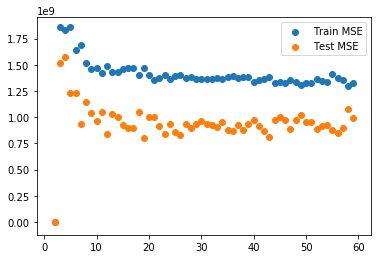

In [27]:
cur_feats = ['OverallQual', 'GrLivArea']
model_scores = [[2, 0.7064032126207153, 0.7216830264190167]] #List of nested lists [[n_feats, train_r2, test_r2], [n_feats, train_r2, test_r2], ... ]
for i in range(3,60):
    cur_feats, new_model_scores = add_feature(cur_feats, X, y)
    model_scores.append(new_model_scores)
plt.scatter([s[0] for s in model_scores], [s[1] for s in model_scores], label='Train MSE')
plt.scatter([s[0] for s in model_scores], [s[2] for s in model_scores], label='Test MSE')
plt.legend()